In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from module import *

In [54]:
df_llama3 = pd.read_csv("test1_llama3_bs.csv")
df_mistral = pd.read_csv("test1_mistral_bs.csv")
df_phi3 = pd.read_csv("test1_phi3_bs.csv")
df_gemma = pd.read_csv("test1_gemma_bs.csv")
df_llama3.head(12)

,question,answer,contexts,ground_truth,faithfulness,answer_relevancy,context_precision,context_recall
0,Quins drets lingüístics reconeix la Constituci...,La Constitució Espanyola reconeix el castellà ...,['1. El castellano es la lengua española ofici...,La Constitució Espanyola reconeix el castellà ...,1.000000,0.704827,1.000000,1.000000
1,Què estableix la Constitució Espanyola sobre l...,La Constitució Espanyola estableix que la dete...,['funciones de averiguación del delito y descu...,La Constitució Espanyola estableix que la dete...,0.333333,0.716046,0.583333,1.000000
2,Quins són els valors superiors de l'ordenament...,"Segons la Constitució Espanyola, els valors su...","[""de les tres cinquenes parts dels seus membre...","Segons la Constitució Espanyola, els valors su...",0.000000,0.755005,0.000000,0.000000
3,Quines condicions específiques es poden aplica...,En un contracte indefinit per a persones amb d...,['la\n\t\nvigència\n\t\ndel\n\t\ncontracte:\n ...,En un contracte indefinit per a persones amb d...,0.000000,0.712008,1.000000,1.000000
4,Com es defineix i s'estableix la durada del pe...,La durada del període de prova en un contracte...,['En\n\t\nel\n\t\ncas\n\t\nque\n\t\nel\n\t\nco...,La durada del període de prova en un contracte...,0.750000,0.636196,1.000000,1.000000
5,Quins drets de bonificació a la Seguretat Soci...,Per als contractes indefinits celebrats amb tr...,['13\nMOD CIND CAT 05_2024CLÀUSULES ESPECÍFIQ...,Per als contractes indefinits celebrats amb tr...,0.000000,0.729198,1.000000,0.500000
6,What are the conditions under which an employm...,The probationary period may be extended or ter...,['If your work performance is not up to the re...,The probationary period may be extended or ter...,1.000000,0.902599,1.000000,1.000000
7,What are the stipulations for holiday entitlem...,"The holiday entitlement is 5.6 weeks per year,...",['forward any untaken holiday entitlement to t...,"The holiday entitlement is 5.6 weeks per year,...",0.400000,0.881851,0.000000,1.000000
8,What are the employer’s rights concerning term...,"During the probationary period, both parties m...",['CLÁUSULAS ESPECÍFICAS DE TRABAJADORES EN SIT...,"During the probationary period, both parties m...",0.000000,0.888767,0.500000,0.666667
9,What are the proposed alternatives for the str...,The document offers alternatives for the Secon...,"['Which of the options in the document, if any...",The document offers alternatives for the Secon...,1.000000,0.883674,0.583333,1.000000


In [55]:
nan_counts_llama3 = df_llama3.isna().sum().sum()
nan_counts_mistral = df_mistral.isna().sum().sum()
nan_counts_phi3 = df_phi3.isna().sum().sum()
nan_counts_gemma = df_gemma.isna().sum().sum()

print("Number of NaN values in llama3: ", nan_counts_llama3)
print("Number of NaN values in mistral: ", nan_counts_mistral)
print("Number of NaN values in phi3: ", nan_counts_phi3)
print("Number of NaN values in gemma: ", nan_counts_gemma)

Number of NaN values in llama3:  0
Number of NaN values in mistral:  4
Number of NaN values in phi3:  48
Number of NaN values in gemma:  6


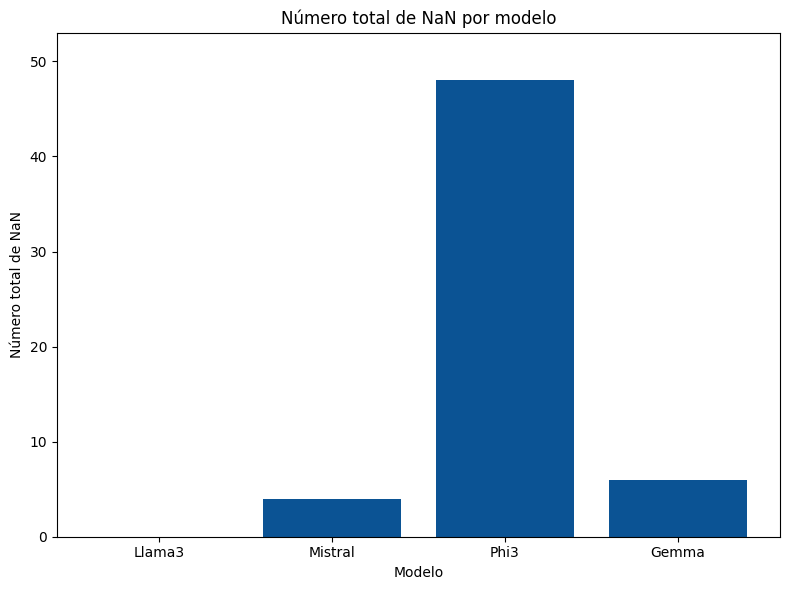

<Figure size 640x480 with 0 Axes>

In [56]:
# Crear un diccionario con los nombres de los modelos y los conteos de NaN
nan_counts = {
    "Llama3": nan_counts_llama3,
    "Mistral": nan_counts_mistral,
    "Phi3": nan_counts_phi3,
    "Gemma": nan_counts_gemma
}

# Convertir el diccionario a un DataFrame para facilitar el graficado
df_nan_counts = pd.DataFrame(list(nan_counts.items()), columns=["Model", "NaN Count"])

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df_nan_counts["Model"], df_nan_counts["NaN Count"], color="#0b5394")

# Configurar etiquetas y título
plt.xlabel("Modelo")
plt.ylabel("Número total de NaN")
plt.title("Número total de NaN por modelo")
plt.ylim(0, df_nan_counts["NaN Count"].max() + 5)  # Añadir un poco de espacio en la parte superior

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Guardar el gráfico en un archivo
plt.savefig("./plots/nan_counts.png")

In [ ]:
df_llama3 = df_llama3.fillna(0, inplace=False)
df_mistral = df_mistral.fillna(0, inplace=False)
df_phi3 = df_phi3.fillna(0, inplace=False)
df_gemma = df_gemma.fillna(0, inplace=False)

In [57]:
df_llama3_cat = df_llama3.iloc[:6]
df_llama3_en = df_llama3.iloc[6:12]
df_llama3_es = df_llama3.iloc[12:]

df_mistral_cat = df_mistral.iloc[:6]
df_mistral_en = df_mistral.iloc[6:12]
df_mistral_es = df_mistral.iloc[12:]

df_phi3_cat = df_phi3.iloc[:6]
df_phi3_en = df_phi3.iloc[6:12]
df_phi3_es = df_phi3.iloc[12:]

df_gemma_cat = df_gemma.iloc[:6]
df_gemma_en = df_gemma.iloc[6:12]
df_gemma_es = df_gemma.iloc[12:]
df_llama3_cat

,question,answer,contexts,ground_truth,faithfulness,answer_relevancy,context_precision,context_recall
0,Quins drets lingüístics reconeix la Constituci...,La Constitució Espanyola reconeix el castellà ...,['1. El castellano es la lengua española ofici...,La Constitució Espanyola reconeix el castellà ...,1.000000,0.704827,1.000000,1.0
1,Què estableix la Constitució Espanyola sobre l...,La Constitució Espanyola estableix que la dete...,['funciones de averiguación del delito y descu...,La Constitució Espanyola estableix que la dete...,0.333333,0.716046,0.583333,1.0
2,Quins són els valors superiors de l'ordenament...,"Segons la Constitució Espanyola, els valors su...","[""de les tres cinquenes parts dels seus membre...","Segons la Constitució Espanyola, els valors su...",0.000000,0.755005,0.000000,0.0
3,Quines condicions específiques es poden aplica...,En un contracte indefinit per a persones amb d...,['la\n\t\nvigència\n\t\ndel\n\t\ncontracte:\n ...,En un contracte indefinit per a persones amb d...,0.000000,0.712008,1.000000,1.0
4,Com es defineix i s'estableix la durada del pe...,La durada del període de prova en un contracte...,['En\n\t\nel\n\t\ncas\n\t\nque\n\t\nel\n\t\nco...,La durada del període de prova en un contracte...,0.750000,0.636196,1.000000,1.0
5,Quins drets de bonificació a la Seguretat Soci...,Per als contractes indefinits celebrats amb tr...,['13\nMOD CIND CAT 05_2024CLÀUSULES ESPECÍFIQ...,Per als contractes indefinits celebrats amb tr...,0.000000,0.729198,1.000000,0.5


In [58]:
df_llama3_cat_gen = df_llama3_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_llama3_en_gen = df_llama3_en.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_llama3_es_gen = df_llama3_es.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])

df_mistral_cat_gen = df_mistral_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_mistral_en_gen = df_mistral_en.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_mistral_es_gen = df_mistral_es.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])

df_phi3_cat_gen = df_phi3_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_phi3_en_gen = df_phi3_en.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_phi3_es_gen = df_phi3_es.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])

df_gemma_cat_gen = df_gemma_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_gemma_en_gen = df_gemma_en.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_gemma_es_gen = df_gemma_es.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_llama3_cat_gen

,faithfulness,answer_relevancy
0,1.000000,0.704827
1,0.333333,0.716046
2,0.000000,0.755005
3,0.000000,0.712008
4,0.750000,0.636196
5,0.000000,0.729198


In [59]:
df_llama3_cat_mean = df_llama3_cat_gen.mean()
df_llama3_en_mean = df_llama3_en_gen.mean()
df_llama3_es_mean = df_llama3_es_gen.mean()

df_mistral_cat_mean = df_mistral_cat_gen.mean()
df_mistral_en_mean = df_mistral_en_gen.mean()
df_mistral_es_mean = df_mistral_es_gen.mean()

df_phi3_cat_mean = df_phi3_cat_gen.mean()
df_phi3_en_mean = df_phi3_en_gen.mean()
df_phi3_es_mean = df_phi3_es_gen.mean()

df_gemma_cat_mean = df_gemma_cat_gen.mean()
df_gemma_en_mean = df_gemma_en_gen.mean()
df_gemma_es_mean = df_gemma_es_gen.mean()
df_llama3_cat_mean

faithfulness        0.347222
answer_relevancy    0.708880
dtype: float64

In [60]:
df_llama3_means = get_df(df_llama3_cat_mean, df_llama3_en_mean, df_llama3_es_mean, mode="gen")
df_mistral_means = get_df(df_mistral_cat_mean, df_mistral_en_mean, df_mistral_es_mean, mode="gen")
df_phi3_means = get_df(df_phi3_cat_mean, df_phi3_en_mean, df_phi3_es_mean, mode="gen")
df_gemma_means = get_df(df_gemma_cat_mean, df_gemma_en_mean, df_gemma_es_mean, mode="gen")
df_llama3_means

Metric,Catalán,Inglés,Español
Faithfulness,0.347222,0.558730,0.583333
Answer Relevancy,0.708880,0.898461,0.688680


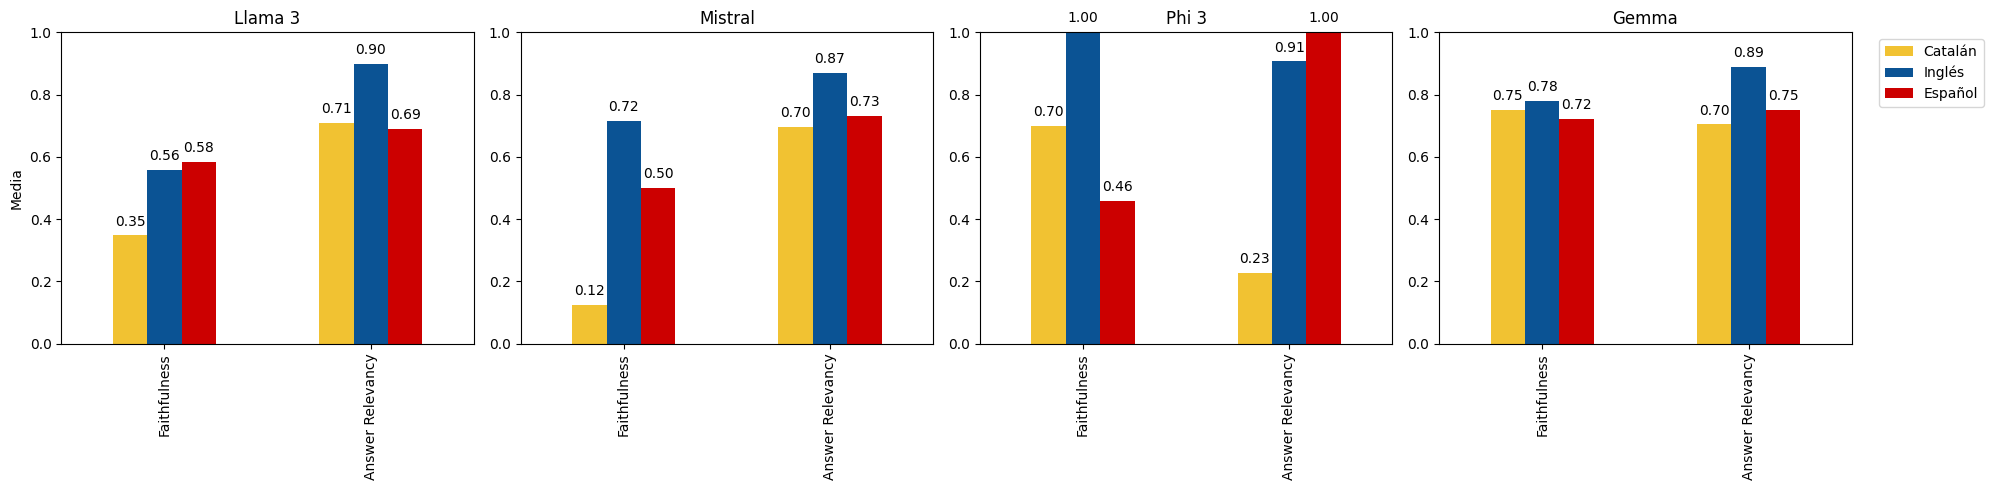

In [61]:
# Crear una figura con subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 fila, 4 columnas

# Definir colores para los gráficos
colors = ["#f1c232", "#0b5394", "#cc0000"]

# Graficar cada DataFrame en un subplot
df_llama3_means.plot(kind="bar", color=colors, ax=axs[0], legend=False)
axs[0].set_title("Llama 3")
axs[0].set_ylabel("Media")
axs[0].set_ylim(0, 1)
add_values_labels(axs[0])

df_mistral_means.plot(kind="bar", color=colors, ax=axs[1], legend=False)
axs[1].set_title("Mistral")
axs[1].set_ylim(0, 1)
add_values_labels(axs[1])

df_phi3_means.plot(kind="bar", color=colors, ax=axs[2], legend=False)
axs[2].set_title("Phi 3")
axs[2].set_ylim(0, 1)
add_values_labels(axs[2])

df_gemma_means.plot(kind="bar", color=colors, ax=axs[3], legend=False)
axs[3].set_title("Gemma")
axs[3].set_ylim(0, 1)
add_values_labels(axs[3])

# Ajustar la leyenda para uno de los subplots
axs[3].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la figura con los subplots
plt.show()

# Guardar la figura en un archivo
fig.savefig("./plots/test1_llm_baai_small.png")


In [62]:
df_llama3_cat_ret = df_llama3_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_mistral_cat_ret = df_mistral_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_phi3_cat_ret = df_phi3_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_gemma_cat_ret = df_gemma_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])

df_llama3_en_ret = df_llama3_en.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_mistral_en_ret = df_mistral_en.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_phi3_en_ret = df_phi3_en.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_gemma_en_ret = df_gemma_en.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])

df_llama3_es_ret = df_llama3_es.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_mistral_es_ret = df_mistral_es.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_phi3_es_ret = df_phi3_es.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_gemma_es_ret = df_gemma_es.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_llama3_cat_ret

,context_precision,context_recall
0,1.000000,1.0
1,0.583333,1.0
2,0.000000,0.0
3,1.000000,1.0
4,1.000000,1.0
5,1.000000,0.5


In [63]:
df_cat_ret = pd.concat([df_llama3_cat_ret, df_mistral_cat_ret, df_phi3_cat_ret, df_gemma_cat_ret], axis=0)
df_en_ret = pd.concat([df_llama3_en_ret, df_mistral_en_ret, df_phi3_en_ret, df_gemma_en_ret], axis=0)
df_es_ret = pd.concat([df_llama3_es_ret, df_mistral_es_ret, df_phi3_es_ret, df_gemma_es_ret], axis=0)
df_cat_ret

,context_precision,context_recall
0,1.000000,1.0
1,0.583333,1.0
2,0.000000,0.0
3,1.000000,1.0
4,1.000000,1.0
5,1.000000,0.5
0,0.833333,1.0
1,0.000000,1.0
2,0.000000,0.0
3,1.000000,1.0


In [64]:
df_cat_ret_mean = df_cat_ret.mean()
df_en_ret_mean = df_en_ret.mean()
df_es_ret_mean = df_es_ret.mean()
df_cat_ret_mean

context_precision    0.789474
context_recall       0.843750
dtype: float64

In [65]:
df_ret_means = pd.DataFrame({
            "Language": ["Catalán", "Inglés", "Español"],
            "Context Precision": [df_cat_ret_mean["context_precision"], df_en_ret_mean["context_precision"], df_es_ret_mean["context_precision"]],
            "Context Recall": [df_cat_ret_mean["context_recall"], df_en_ret_mean["context_recall"], df_es_ret_mean["context_recall"]]
        }).set_index("Language").T
df_ret_means

Metric,Catalán,Inglés,Español
Context Precision,0.789474,0.776786,0.780518
Context Recall,0.843750,0.748413,0.702921


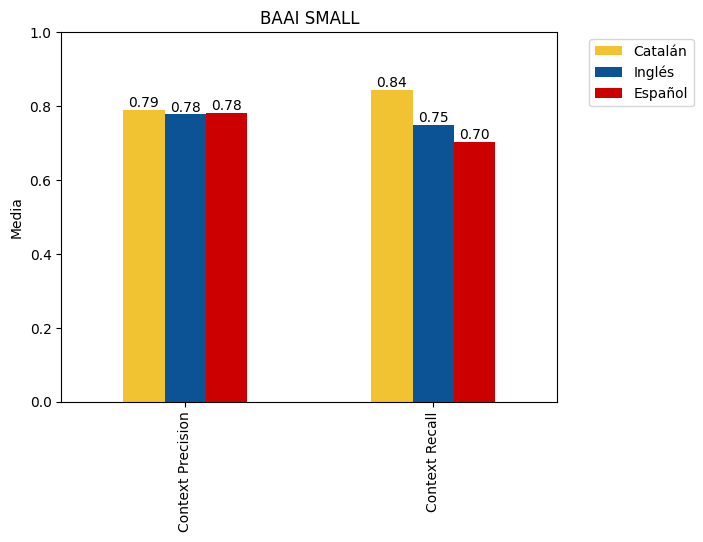

In [66]:
# Definir colores para los gráficos
colors = ["#f1c232", "#0b5394", "#cc0000"]

# Graficar cada DataFrame en un subplot
ax = df_ret_means.plot(kind="bar", color=colors)

# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title("BAAI SMALL")
plt.ylabel("Media")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar la figura con los subplots
plt.show()

# Guardar la figura en un archivo
fig.savefig("./plots/test1_baai_small.png")